<a href="https://colab.research.google.com/github/ade-mola/gdg-ogbomoso/blob/master/tf_Session().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NUMBER ONE**


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras


In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape: ', x_train.shape)  # num_of_samples * width * height * color_channel
print('y_train shape: ', y_train.shape)  # sets of labels to data in x_train
print('x_test shape: ', x_test.shape)    # num_of_samples * width * height * color_channel
print('y_test shape: ', y_test.shape)    # sets of labels to data in x_test

print(x_train.shape[0], " training samples")
print(y_train.shape[0], " labels")
print(x_test.shape[0], " test samples")
print(y_test.shape[0], " labels")

Using TensorFlow backend.


x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)
50000  training samples
50000  labels
10000  test samples
10000  labels


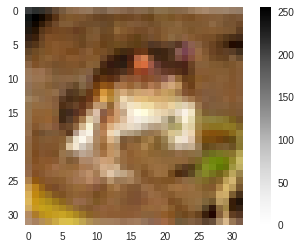

In [4]:
# preprocess data

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)


In [0]:
# pixel values falls between range of 0 to 255
# we need to scale these values to a range of 0 and 1

x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
y_train = y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [0]:
# declare variables to work with

epochs = 50  # how many time we train on the dataset, one forward pass
batch_size = 64  # number of samples propagated thru the network in one epoch

class_names = ["airplane", "automobile", "bird", "cat",
               "deer", "dog", "frog", "horse", "ship", "truck"]

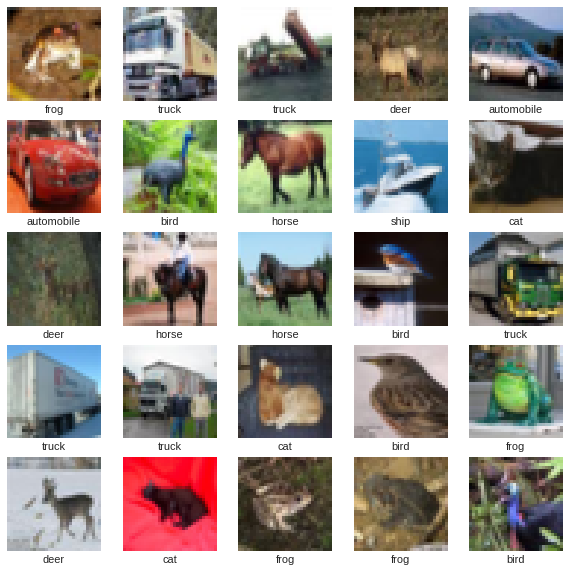

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])


**Building the Model**

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) # this is used to extract tangible features
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

**Training the Model**

In [10]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

# train model
model.fit(x_train, tf.keras.utils.to_categorical(y_train),
          batch_size=batch_size,
          shuffle=True,
          epochs=epochs,
          validation_data=(x_test, tf.keras.utils.to_categorical(y_test)))

# evaluate model
score = model.evaluate(x_test, tf.keras.utils.to_categorical(y_test))
print(score)

print('Accuracy: %.3f' % score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.5735 - acc: 0.4178 - val_loss: 1.2132 - val_acc: 0.5653
Epoch 2/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.1234 - acc: 0.6006 - val_loss: 0.9632 - val_acc: 0.6601
Epoch 3/50
50000/50000 [==============================] - 16s 323us/step - loss: 0.9508 - acc: 0.6645 - val_loss: 0.9045 - val_acc: 0.6783
Epoch 4/50
50000/50000 [==============================] - 16s 324us/step - loss: 0.8460 - acc: 0.7037 - val_loss: 0.7631 - val_acc: 0.7357
Epoch 5/50
50000/50000 [==============================] - 16s 325us/step - loss: 0.7767 - acc: 0.7273 - val_loss: 0.7269 - val_acc: 0.7485
Epoch 6/50
50000/50000 [==============================] - 16s 324us/step - loss: 0.7309 - acc: 0.7445 - val_loss: 0.7419 - val_acc: 0.7406
Epoch 7/50
50000/50000 [==============================] - 16s 324us/step - loss: 0.6841 - acc: 0.7597 - val_loss: 0.

In [0]:
predictions = model.predict(x_test)


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


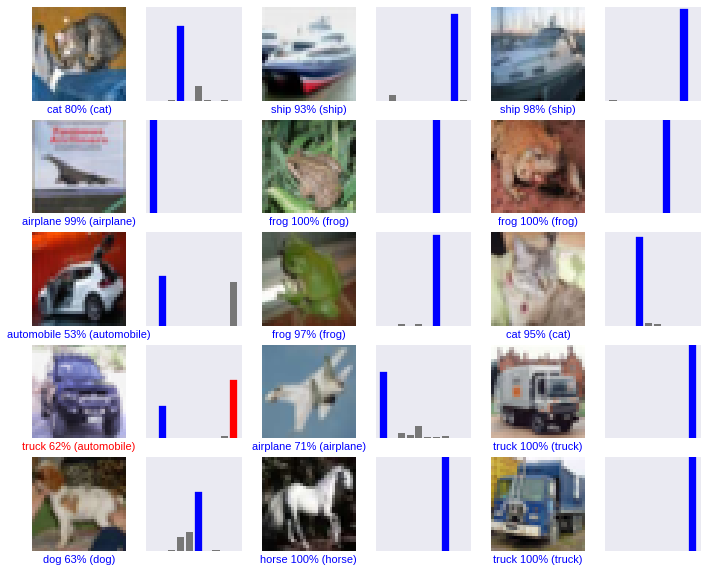

In [16]:
y_test = y_test.reshape(-1)
y_test

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in np.arange(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
